<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Demo 9.5: Working with Text
- Using [NLTK](http://www.nltk.org) (Natural Language Toolkit)
- Using [spaCy](https://spacy.io)

INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

## Import libraries

In [48]:
## Import Libraries
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

import regex as re
import spacy
import nltk

## Load data

In [2]:
## Loading the data

input_file = 'ncc-1701-D.txt'

with open(input_file, 'r') as f:
    text = f.read()

## Inspect the data

In [7]:
print(text[:20000])

USS Enterprise (NCC-1701-D)

"For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different."

The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.

==History==
===Construction and launch===
The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.

One of the ship's nacelle tube was

## Work the data
- if necessary or desired
    - remove text or content, e.g. quotes (") or metadata (===)
    - add content or markers, e.g. (#FLAG, --NAME--)
    - remove or convert special symbols, e.g. "é" to "e"
    - remove or convert emoticons

In [34]:
# ANSWER
text = re.sub(r'["=====()-]',"", text)

In [35]:
text = re.sub(r'\n\n+', ' ', text)

In [36]:
text = re.sub(r'\n',' ',text)

## Helper method

In [37]:
# create a bar chart of the frequency of the words in the text
def plot_words(tokens, top = 30):
    tokens_counter = Counter(tokens)
    tok = [t for (t, _) in tokens_counter.most_common()]
    val = [v for (_, v) in tokens_counter.most_common()]

    plt.figure(figsize = (16, 6))
    plt.bar(tok[:top], val[:top])
    plt.title('Number of terms: %d' % len(tokens_counter))
    plt.xticks(rotation = 90)

    plt.show()

## spaCy model invocation and text processing
spaCy does the processing of the text as part of the reading of the data.

In [38]:
# load spaCy and the English model
nlp = spacy.load('en_core_web_sm')

# process the text
doc = nlp(text)

In [39]:
doc

USS Enterprise NCC1701D For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different. The USS Enterprise NCC1701D was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371. History Construction and launch The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus. One of the ship's nacelle tube was the site of a multiple 

## Tokenise

In [40]:
# only show the results
# spaCy has done it already
for i, t in enumerate(doc):
    print('%2d| %r' % (i+1, t.text))
    if t.text == '.':
        break

 1| 'USS'
 2| 'Enterprise'
 3| 'NCC1701D'
 4| 'For'
 5| 'five'
 6| 'hundred'
 7| 'years'
 8| ','
 9| 'every'
10| 'ship'
11| 'that'
12| 'has'
13| 'borne'
14| 'the'
15| 'name'
16| 'of'
17| 'the'
18| 'Enterprise'
19| 'has'
20| 'become'
21| 'a'
22| 'legend'
23| '.'


In [ ]:
# ANSWER

### Stop Words

In [41]:
## spaCy
print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
for i, t in enumerate(doc):
    print('%2d| %-15r %r' % (i+1, t.text, ('' if t.is_stop else t.text)))

    # break after the first sentence
    if t.text == '.':
        break

i | with stop words without
--| --------------- ------------
 1| 'USS'           'USS'
 2| 'Enterprise'    'Enterprise'
 3| 'NCC1701D'      'NCC1701D'
 4| 'For'           ''
 5| 'five'          ''
 6| 'hundred'       ''
 7| 'years'         'years'
 8| ','             ','
 9| 'every'         ''
10| 'ship'          'ship'
11| 'that'          ''
12| 'has'           ''
13| 'borne'         'borne'
14| 'the'           ''
15| 'name'          ''
16| 'of'            ''
17| 'the'           ''
18| 'Enterprise'    'Enterprise'
19| 'has'           ''
20| 'become'        ''
21| 'a'             ''
22| 'legend'        'legend'
23| '.'             '.'


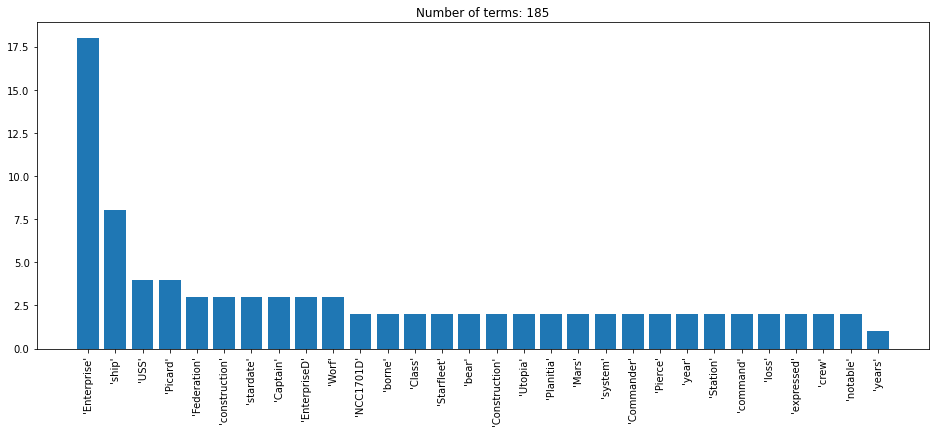

In [42]:
plot_words(['%r' % t.text for t in doc if not (t.is_stop | t.is_punct)])

### Check Part of Speech

In [43]:
## spaCy
for i, t in enumerate(doc):
    print('%2d|%-12r : %-5s %s' % (i+1, t.text, t.pos_, t.tag_))
    if t.text == '.':
        break

 1|'USS'        : PROPN NNP
 2|'Enterprise' : NOUN  NN
 3|'NCC1701D'   : PROPN NNP
 4|'For'        : ADP   IN
 5|'five'       : NUM   CD
 6|'hundred'    : NUM   CD
 7|'years'      : NOUN  NNS
 8|','          : PUNCT ,
 9|'every'      : DET   DT
10|'ship'       : NOUN  NN
11|'that'       : DET   WDT
12|'has'        : AUX   VBZ
13|'borne'      : VERB  VBN
14|'the'        : DET   DT
15|'name'       : NOUN  NN
16|'of'         : ADP   IN
17|'the'        : DET   DT
18|'Enterprise' : NOUN  NN
19|'has'        : AUX   VBZ
20|'become'     : VERB  VBN
21|'a'          : DET   DT
22|'legend'     : NOUN  NN
23|'.'          : PUNCT .


### Lemmatisation

In [44]:
## spaCy
print('i | Token        Lemma')
print('--| ------------ ------------')
for i, t in enumerate(doc):
    print('%2d| %-12r %r' % (i+1, t.text, t.lemma_))
    if t.text == '.':
        break

i | Token        Lemma
--| ------------ ------------
 1| 'USS'        'USS'
 2| 'Enterprise' 'enterprise'
 3| 'NCC1701D'   'NCC1701D'
 4| 'For'        'for'
 5| 'five'       'five'
 6| 'hundred'    'hundred'
 7| 'years'      'year'
 8| ','          ','
 9| 'every'      'every'
10| 'ship'       'ship'
11| 'that'       'that'
12| 'has'        'have'
13| 'borne'      'bear'
14| 'the'        'the'
15| 'name'       'name'
16| 'of'         'of'
17| 'the'        'the'
18| 'Enterprise' 'enterprise'
19| 'has'        'have'
20| 'become'     'become'
21| 'a'          'a'
22| 'legend'     'legend'
23| '.'          '.'


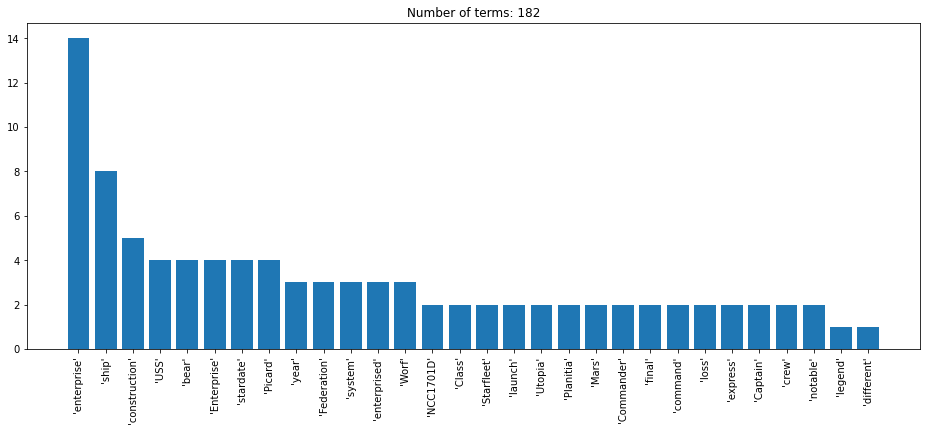

In [45]:
plot_words(['%r' % t.lemma_ for t in doc if not (t.is_stop | t.is_punct)])

### Entity Recognition

In [46]:
## spaCy
for i, s in enumerate(doc.sents):
    print('%2d: %s' % (i, re.sub(r'\n+', '', s.text)))
    if s.as_doc().ents:
        print('-'*80)
        for e in s.as_doc().ents:
            print('%-11s: %s' % (e.label_, re.sub(r'\n+', '', e.text)))
    print('='*80)

 0: USS Enterprise NCC1701D
 1: For five hundred years, every ship that has borne the name of the Enterprise has become a legend.
--------------------------------------------------------------------------------
DATE       : five hundred years
ORG        : Enterprise
 2: This one is no different.
 3: The USS Enterprise NCC1701D was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise.
--------------------------------------------------------------------------------
PRODUCT    : The USS Enterprise
DATE       : a 24th century
ORG        : United Federation of Planets Galaxy
NORP       : Starfleet
 4: During her career, the Enterprise served as the Federation flagship.
--------------------------------------------------------------------------------
ORG        : Enterprise
ORG        : Federation
 5: The Enterprise was destroyed during the Battle of Veridian III in 2371.
----------------------------

## Extra: Using NLTK for NLP

### Tokenise

In [50]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [51]:
# use nltk to find tokens
tokens = nltk.word_tokenize(text)

for i, t in enumerate(tokens[:25]):
    print('%2d| %r' % (i+1, t))

 1| 'USS'
 2| 'Enterprise'
 3| 'NCC1701D'
 4| 'For'
 5| 'five'
 6| 'hundred'
 7| 'years'
 8| ','
 9| 'every'
10| 'ship'
11| 'that'
12| 'has'
13| 'borne'
14| 'the'
15| 'name'
16| 'of'
17| 'the'
18| 'Enterprise'
19| 'has'
20| 'become'
21| 'a'
22| 'legend'
23| '.'
24| 'This'
25| 'one'


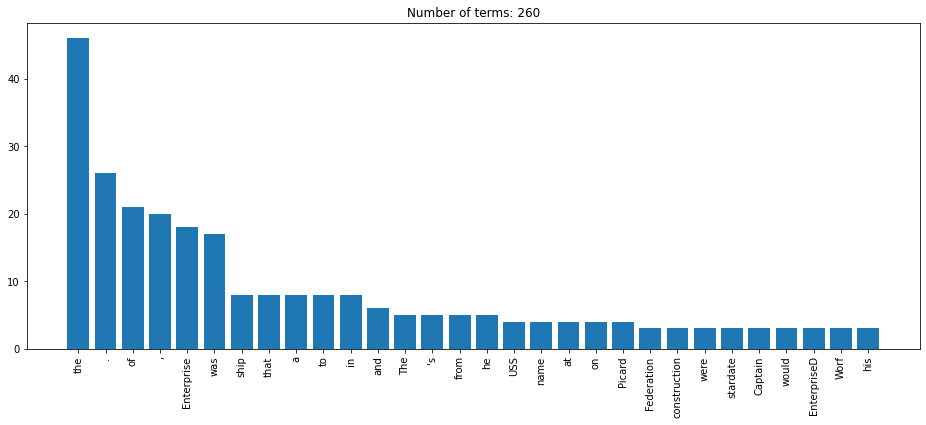

In [52]:
plot_words(tokens)

### Stop words

In [53]:
stopWords = nltk.corpus.stopwords.words('english')

stopWords.sort()
print(', '.join(stopWords))

a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, her, here, hers, herself, him, himself, his, how, i, if, in, into, is, isn, isn't, it, it's, its, itself, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she's, should, should've, shouldn, shouldn't, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, this, those, through, to, too, under, until, up, ve, very, was, wasn, wasn't, we, were, weren, weren't, what, when, where, which, while, who, whom, why, w

In [76]:
no_tokens = []
for word in tokens:
    if word not in stopWords:
        no_tokens.append(word)

In [74]:
no_tokens

['USS',
 'Enterprise',
 'NCC1701D',
 'For',
 'five',
 'hundred',
 'years',
 ',',
 'every',
 'ship',
 'borne',
 'name',
 'Enterprise',
 'become',
 'legend',
 '.',
 'This',
 'one',
 'different',
 '.',
 'The',
 'USS',
 'Enterprise',
 'NCC1701D',
 '24th',
 'century',
 'United',
 'Federation',
 'Planets',
 'Galaxy',
 'Class',
 'starship',
 'operated',
 'Starfleet',
 ',',
 'fifth',
 'Federation',
 'ship',
 'bear',
 'name',
 'Enterprise',
 '.',
 'During',
 'career',
 ',',
 'Enterprise',
 'served',
 'Federation',
 'flagship',
 '.',
 'The',
 'Enterprise',
 'destroyed',
 'Battle',
 'Veridian',
 'III',
 '2371',
 '.',
 'History',
 'Construction',
 'launch',
 'The',
 'Enterprise',
 'built',
 'Utopia',
 'Planitia',
 'Fleet',
 'Yards',
 'orbiting',
 'Mars',
 'Solar',
 'system',
 '.',
 'The',
 'construction',
 'massive',
 'undertaking',
 ',',
 'involving',
 'thousands',
 'people',
 'across',
 'disciplines',
 '.',
 'Construction',
 'supervised',
 'Commander',
 'Orfil',
 'Quinteros',
 '.',
 'Dr.',
 'Lea

In [54]:
# ANSWER
# NOTE: see the `.lower()` method applied to token
tokens_no_stop = '' # create a list of tokens withOUT the stop words 

In [55]:
## NLTK
i = 0
j = 0

print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
while i < len(tokens):
    # same word
    if tokens[i] == tokens_no_stop[j]:
        print('%2d| %-15r %r' % (i+1, tokens[i], tokens_no_stop[j]))
        j += 1
    # not the same word
    else:
        print('%2d| %-15r' % (i+1, tokens[i]))

    # next word
    i += 1
    # break after the first sentence
    if tokens[i-1] == '.':
        break

i | with stop words without
--| --------------- ------------


IndexError: string index out of range

In [ ]:
# Create plot of words without stopword
# ANSWER

### Check Part of Speech

In [64]:
# define PoS
pos_list = {
    'CC':   'coordinating conjunction',
    'CD':   'cardinal digit',
    'DT':   'determiner',
    'EX':   'existential there (like: "there is" ... think of it like "there exists")',
    'FW':   'foreign word',
    'IN':   'preposition/subordinating conjunction',
    'JJ':   'adjective "big"',
    'JJR':  'adjective, comparative "bigger"',
    'JJS':  'adjective, superlative "biggest"',
    'LS':   'list marker 1)',
    'MD':   'modal could, will',
    'NN':   'noun, singular "desk"',
    'NNS':  'noun plural "desks"',
    'NNP':  'proper noun, singular "Harrison"',
    'NNPS': 'proper noun, plural "Americans"',
    'PDT':  'predeterminer "all the kids"',
    'POS':  'possessive ending parent"s',
    'PRP':  'personal pronoun I, he, she',
    'PRP$': 'possessive pronoun my, his, hers',
    'RB':   'adverb very, silently,',
    'RBR':  'adverb, comparative better',
    'RBS':  'adverb, superlative best',
    'RP':   'particle give up',
    'TO':   'to go "to" the store.',
    'UH':   'interjection errrrrrrrm',
    'VB':   'verb, base form take',
    'VBD':  'verb, past tense took',
    'VBG':  'verb, gerund/present participle taking',
    'VBN':  'verb, past participle taken',
    'VBP':  'verb, sing. present, non-3d take',
    'VBZ':  'verb, 3rd person sing. present takes',
    'WDT':  'wh-determiner which',
    'WP':   'wh-pronoun who, what',
    'WP$':  'possessive wh-pronoun whose',
    'WRB':  'wh-abverb where, when',
}

In [77]:
## nltk
tagged = nltk.pos_tag(no_tokens)

for i, t in enumerate(tagged[:25]):
    print('%2d|%-12r : %-4s %s' % (i+1, t[0], t[1], (pos_list[t[1]] if t[1] in pos_list else '-')))

 1|'USS'        : NNP  proper noun, singular "Harrison"
 2|'Enterprise' : NNP  proper noun, singular "Harrison"
 3|'NCC1701D'   : NNP  proper noun, singular "Harrison"
 4|'For'        : IN   preposition/subordinating conjunction
 5|'five'       : CD   cardinal digit
 6|'hundred'    : CD   cardinal digit
 7|'years'      : NNS  noun plural "desks"
 8|','          : ,    -
 9|'every'      : DT   determiner
10|'ship'       : NN   noun, singular "desk"
11|'borne'      : JJ   adjective "big"
12|'name'       : NN   noun, singular "desk"
13|'Enterprise' : NNP  proper noun, singular "Harrison"
14|'become'     : NN   noun, singular "desk"
15|'legend'     : NN   noun, singular "desk"
16|'.'          : .    -
17|'This'       : DT   determiner
18|'one'        : CD   cardinal digit
19|'different'  : JJ   adjective "big"
20|'.'          : .    -
21|'The'        : DT   determiner
22|'USS'        : NNP  proper noun, singular "Harrison"
23|'Enterprise' : NNP  proper noun, singular "Harrison"
24|'NCC1701

### Stemming

In [66]:
## nltk
ps = nltk.porter.PorterStemmer()
stemmed = ' '.join([ps.stem(word) for word in text.split()])

### Lemmatisation

In [67]:
## nltk
wl = nltk.stem.WordNetLemmatizer()
lemma = ' '.join([wl.lemmatize(word) for word in text.split()])

In [68]:
## nltk
dot = stemmed.find('.') + 1
sl = stemmed[:dot].split()
dot = lemma.find('.') + 1
ll = lemma[:dot].split()

print('i | Stem           Lemma')
print('--| -------------- ------------')
for i, p in enumerate(zip(sl, ll)):
    print('%2d| %-12r   %-12r' % (i+1, p[0], p[1]))

i | Stem           Lemma
--| -------------- ------------
 1| 'uss'          'USS'       
 2| 'enterpris'    'Enterprise'
 3| 'ncc1701d'     'NCC1701D'  
 4| 'for'          'For'       
 5| 'five'         'five'      
 6| 'hundr'        'hundred'   
 7| 'years,'       'years,'    
 8| 'everi'        'every'     
 9| 'ship'         'ship'      
10| 'that'         'that'      
11| 'ha'           'ha'        
12| 'born'         'borne'     
13| 'the'          'the'       
14| 'name'         'name'      
15| 'of'           'of'        
16| 'the'          'the'       
17| 'enterpris'    'Enterprise'
18| 'ha'           'ha'        
19| 'becom'        'become'    
20| 'a'            'a'         
21| 'legend.'      'legend.'   


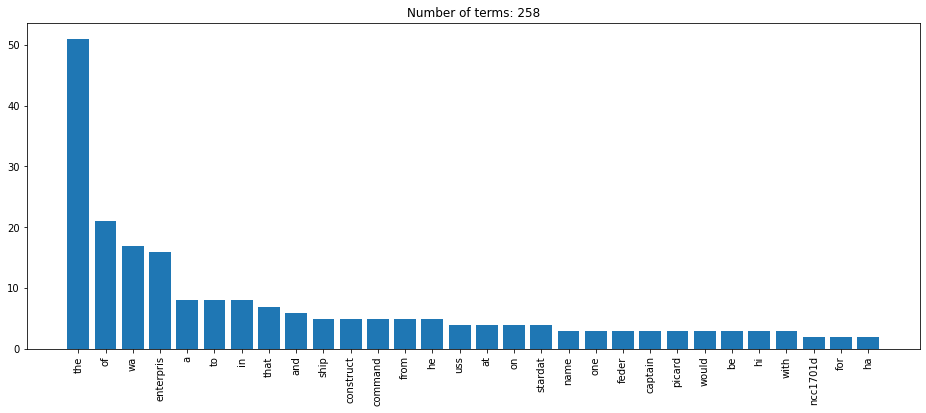

In [69]:
plot_words(stemmed.split())

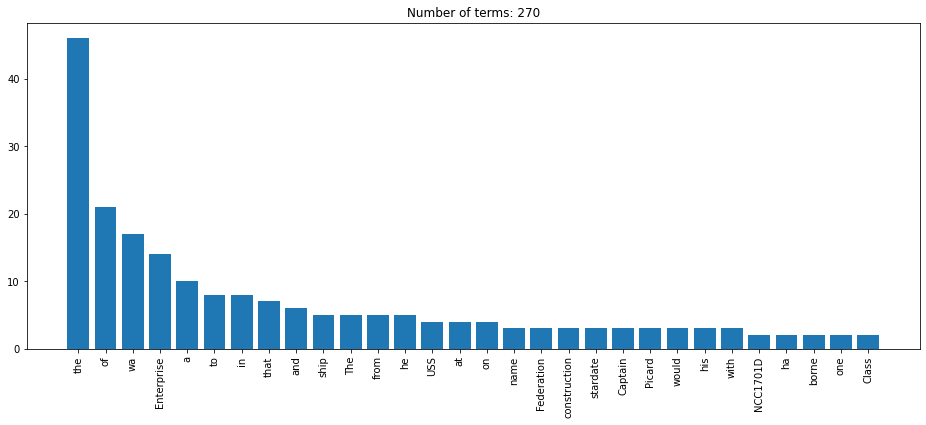

In [70]:
plot_words(lemma.split())

### Entity recognition

In [71]:
## nltk
entities = nltk.chunk.ne_chunk(tagged)

for e in entities:
    s = re.sub(r'[\(\)]', '', str(e))
    if s.find('/NNP') > 0:
        t = s.split()[0]
        n = ' '.join([re.sub(r'/NNP', '', x) for x in s.split()[1:]])
        print('%-12s: %s' % (t, n))

ORGANIZATION: USS Enterprise
ORGANIZATION: Enterprise
ORGANIZATION: USS Enterprise
PERSON      : United Federation
ORGANIZATION: Planets Galaxy
PERSON      : Starfleet
ORGANIZATION: Enterprise
ORGANIZATION: Federation
ORGANIZATION: Battle
GPE         : Veridian
PERSON      : History Construction
ORGANIZATION: Enterprise
ORGANIZATION: Utopia Planitia Fleet
PERSON      : Mars
ORGANIZATION: Solar
ORGANIZATION: Commander Orfil Quinteros
PERSON      : Brahms
ORGANIZATION: Enterprise
ORGANIZATION: Enterprise
ORGANIZATION: USS Pegasus
ORGANIZATION: Utopia Planitia
PERSON      : Walter Pierce
PERSON      : Marla Finn
PERSON      : William Hodges
PERSON      : Pierce
ORGANIZATION: Enterprise
PERSON      : Mars
ORGANIZATION: Enterprise
ORGANIZATION: Enterprise
FACILITY    : Earth Station McKinley
PERSON      : Captain JeanLuc Picard
ORGANIZATION: Rear Admiral Norah Satie
PERSON      : Legacy Commander Riker
ORGANIZATION: Enterprise
PERSON      : Picard
ORGANIZATION: EnterpriseD
PERSON      : Dee



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



